In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

This application of the balance law gives us two word equations, one for each compartment. We have:

{Rate of change of drug in GI tract} = {Rate of drug intake} - {Rate drug leaves GI-tract}

{Rate of change of drug in blood} = {Rate drug enters blood} - {Rate drug leaves blood}


(Equation 2.21)
# Model I: A single fast-dissolving cold pill
In the GI-tract, we consider the pill to have been swallowed, and so after this event (over subsequent time) we have nothing more entering the GI-tract. The pill quickly dissolves, and the drug begins to enter the bloodstream from the GI-tract. So, for the GI-tract, there is only an output term.

Assuming the output rate is proportional to the GI-tract drug concentration, which is therefore proportional to the amount of drug in the bloodstream, the differential equation for the GI-tract can be described as: 

*note: the below equation is similar to that of radioactive decay*

dx/dt = -k1 * x

with the initial condition:

x(0) = x0

where:
- `x0` is the amount of drug in the pill (initial condition),
- `k1` is a positive coefficient of proportionality (the rate constant).

We assume that the instant the pill enters the GI-tract at t = 0, it dissolves instantaneously, so x(0) = x0.




In the bloodstream the initial amount of the drug is zero, so y(0) = 0. The level in the
bloodstream increases as the drug diffuses from the GI-tract and decreases as the kidneys
and liver remove it. Thus,
1. dy/dt = k1 * x - k2 * y
2. y(0) = 0

where:
* k2 is the decay rate(that is the medicine is being broken down by liver and kidneys with this constant rate)

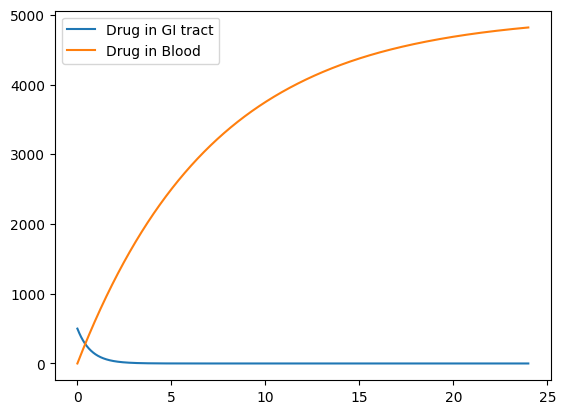

In [7]:
def decayDrugFromGI(time,drugInGI,drugAssimilationRate):
    #k1 = decay rate
    #t = time
    #x = drug amount in GI-tract
    return - drugInGI * drugAssimilationRate

def drugInBlood(time,drugInBlood,drugInGI,DrugAssimilationRate,DrugInBloodDecayRate):
    return drugInGI*DrugAssimilationRate - drugInBlood*DrugInBloodDecayRate
#initial parameters Batch-1
initialAmountInGI = 500 #500mg drug
initialAmountInBlood = 0
drugAssimilationRate = 1.386
drugInBloodDecayRate = 0.1386
timespan = (0,24) #think is terms of the whole day
step_size = 0.01 #0.01 hours = 1 minute
solution1 = solve_ivp(decayDrugFromGI,timespan,[initialAmountInGI],t_eval=np.arange(timespan[0],timespan[1],step_size),args=(drugAssimilationRate,))
solution2 = solve_ivp(drugInBlood,timespan,[initialAmountInBlood],t_eval=np.arange(timespan[0],timespan[1],step_size),args=(initialAmountInGI,drugAssimilationRate,drugInBloodDecayRate))
fig,ax = plt.subplots()

ax.plot(solution1.t,solution1.y[0],label="Drug in GI tract")
ax.plot(solution2.t,solution2.y[0],label="Drug in Blood")
ax.legend()
plt.show()
#wrong code

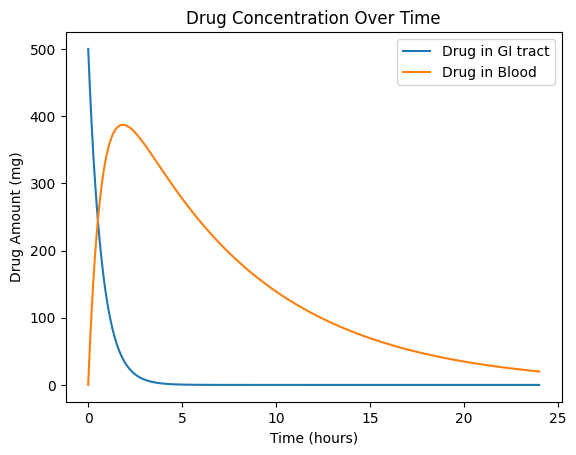

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def decayDrugFromGI(t, y, drugAssimilationRate):
    drugInGI = y[0]
    return [-drugInGI * drugAssimilationRate]

def drugInBlood(t, y, drugAssimilationRate, drugInBloodDecayRate):
    drugInGI, drugInBlood = y
    dDrugInGI_dt = -drugInGI * drugAssimilationRate
    dDrugInBlood_dt = drugInGI * drugAssimilationRate - drugInBlood * drugInBloodDecayRate
    return [dDrugInGI_dt, dDrugInBlood_dt]

# Initial parameters
initialAmountInGI = 500  # 500mg drug
initialAmountInBlood = 0
drugAssimilationRate = 1.386
drugInBloodDecayRate = 0.1386
timespan = (0, 24)  # in hours
step_size = 0.01  # 0.01 hours = 1 minute

# Solve differential equations
solution = solve_ivp(
    fun=lambda t, y: drugInBlood(t, y, drugAssimilationRate, drugInBloodDecayRate),
    t_span=timespan,
    y0=[initialAmountInGI, initialAmountInBlood],
    t_eval=np.arange(timespan[0], timespan[1], step_size)
)

# Plot results
fig, ax = plt.subplots()
ax.plot(solution.t, solution.y[0], label="Drug in GI tract")
ax.plot(solution.t, solution.y[1], label="Drug in Blood")
ax.legend()
plt.xlabel('Time (hours)')
plt.ylabel('Drug Amount (mg)')
plt.title('Drug Concentration Over Time')
plt.show()
